## Building a Fully Connected Feedforward Neural Network (FCFNN) for solving the equation f(x) = 5x^2 +10x -2 training the FCFNN plotting original f(x) and predicted f(x)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_4 (InputLayer)  │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden_Layer_1 (Dense)      │ (None, 8)             │         16 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden_Layer_2 (Dense)      │ (None, 16)            │        144 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden_Layer_3 (Dense)      │ (None, 64)            │      1,088 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden_Layer_4 (Dense)      │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden_Layer_5 (Dense)      │ (None, 32)            │      4,128 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden_Layer_6 (Dense)      │ (None, 8)             │        264 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Output_Layer (Dense)        │ (None, 1)             │          9 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 13,969 (54.57 KB)

 Trainable params: 13,969 (54.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 225109824.0000 - val_loss: 30725964.0000
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 30209240.0000 - val_loss: 29566494.0000
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29100710.0000 - val_loss: 28230030.0000
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27795364.0000 - val_loss: 27300454.0000
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 24988326.0000 - val_loss: 22803630.0000
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15408802.0000 - val_loss: 11301926.0000
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5463223.5000 - val_loss: 2874456.0000
Epoch 8/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2147268.0000 - val_loss: 1255786.1250
Epoch 9/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 939475.5000 - val_loss: 559000.0000
Epoch 10/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 633704.8125 - val_loss: 404516.8438


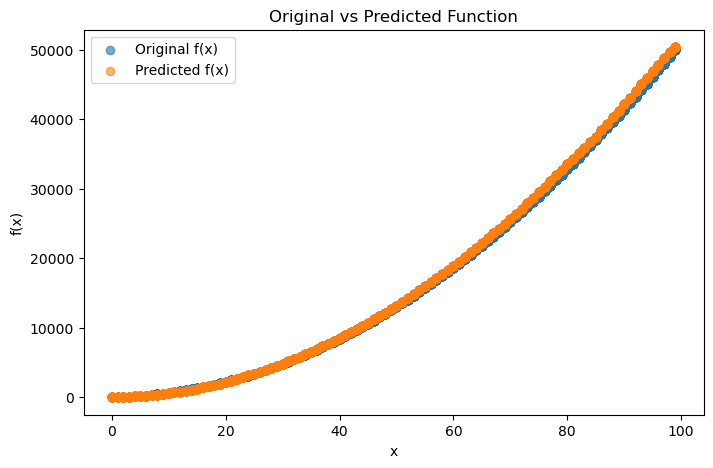

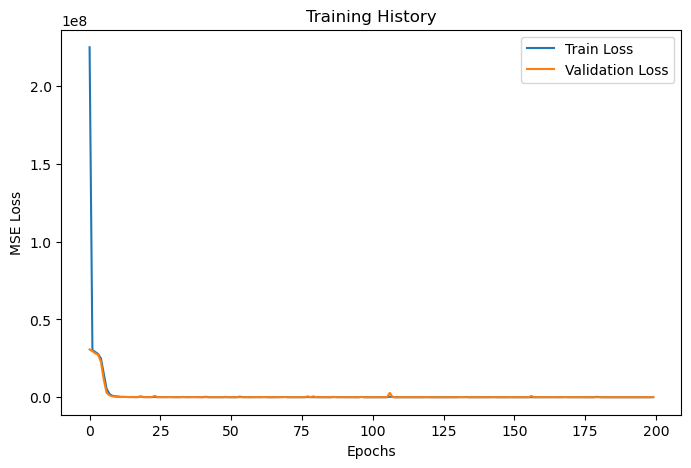

In [5]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt

# Polynomial function
def my_polynomial(x):
    return 5 * (x ** 2) + 10 * x - 2

# Generate dataset
def data_process():
    n = 10000
    x = np.random.randint(0, 100, n)  # Random integers 0-99
    y = my_polynomial(x)
    x = x.reshape(-1, 1)  # Make it 2D for Keras
    y = y.reshape(-1, 1)
    return x, y

# Split dataset
def prepare_train_test_val():
    x, y = data_process()
    total_n = len(x)
    train_n = int(total_n * 0.7)
    val_n = int(total_n * 0.1)

    trainX = x[:train_n]
    trainY = y[:train_n]

    valX = x[train_n:train_n+val_n]
    valY = y[train_n:train_n+val_n]

    testX = x[train_n+val_n:]
    testY = y[train_n+val_n:]

    return (trainX, trainY), (valX, valY), (testX, testY)

# Build the model
def build_model():
    inputs = Input((1,))
    h1 = Dense(8, activation='relu', name='Hidden_Layer_1')(inputs)
    h2 = Dense(16, activation='relu', name='Hidden_Layer_2')(h1)
    h3 = Dense(64, activation='relu', name='Hidden_Layer_3')(h2)
    h4 = Dense(128, activation='relu', name='Hidden_Layer_4')(h3)
    h5 = Dense(32, activation='relu', name='Hidden_Layer_5')(h4)
    h6 = Dense(8, activation='relu', name='Hidden_Layer_6')(h5)
    outputs = Dense(1, name='Output_Layer')(h6)
    
    model = Model(inputs, outputs)
    model.summary(show_trainable=True)
    return model

# Main function
def main():
    model = build_model()
    model.compile(optimizer='adam', loss='mse')

    (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_test_val()

    # Train the model
    history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=200, batch_size=32, verbose=1)

    # Evaluate on test data
    test_loss = model.evaluate(testX, testY)
    print(f"\nTest Mean Squared Error: {test_loss:.4f}")

    # Predict on test data
    y_pred = model.predict(testX)

    # Plot original vs predicted
    plt.figure(figsize=(8,5))
    plt.scatter(testX, testY, label="Original f(x)", alpha=0.6)
    plt.scatter(testX, y_pred, label="Predicted f(x)", alpha=0.6)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Original vs Predicted Function")
    plt.legend()
    plt.savefig("fx_prediction.png", dpi=300)  # save for LaTeX
    plt.show()

    # Plot training history
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Training History")
    plt.legend()
    plt.savefig("training_history.png", dpi=300)
    plt.show()

if __name__ == '__main__':
    main()
